In [1]:
from neural_network.binary_nn import NN
from datasets.sipm_dataset import SiPMDataset
from genetic_algorithm.algorithm import GeneticAlgorithm
from genetic_algorithm.utils import confusion_matrix, tuple_to_label


In [2]:
# GA parameters
n_samples = 128
n_frames = 50

# GA parameters
pop_size = 10
ngen = 5 

inp = SiPMDataset(n_samples = n_samples, n_frames = n_frames)

nn = NN((inp.n_samples, 32, 32, len(inp.LABLES)), input=inp, description="Good_vs_Ugly")

ga = GeneticAlgorithm(
    nn = nn, 
    pop_size = pop_size,
    ngen = ngen
)


In [3]:
pop, log, hof = ga.run()

Start GA, run for 5 generations ...
    pop=10, cxpb=0.8, cxpb_bit=0.5, mutpb/genome=3.0, tourn_size=3, elite_size=2, pool=None 
Create init population...
Start evolution...
       accuracy       	                           match                            	         size         
----------------------	------------------------------------------------------------	----------------------
gen	max 	nevals	avg  	diversity	gen	max 	min 	nevals	time	gen	max  	nevals
0  	0.37	10    	0.498	0.7      	0  	0.55	0.46	10    	10 s	0  	0.159	10    
1  	0.38	10    	0.511	0.6      	1  	0.53	0.47	10    	20 s	1  	0.159	10    
2  	0.46	10    	0.516	0.9      	2  	0.56	0.45	10    	31 s	2  	0.158	10    
3  	0.45	10    	0.473	1        	3  	0.58	0   	10    	41 s	3  	0.15 	10    
4  	0.4 	10    	0.505	0.9      	4  	0.56	0.47	10    	52 s	4  	0.147	10    
5  	0.41	10    	0.528	0.8      	5  	0.555	0.505	10    	1 m, 2 s	5  	0.147	10    
Evolution finished.


In [4]:
print("Best fitness:", ga.nn.evaluate(hof[0])[0])
print("GA run complete.\n")

Best fitness: 0.42
GA run complete.



# Plotting

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Publication
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'

plt.rcParams['savefig.facecolor']='white'

%matplotlib inline

In [6]:
indi = hof[0]

nn = NN((inp.n_samples, 32, 32, len(inp.LABLES)), individual=indi, input=inp, description="Good_vs_Ugly")
# print( nn.fitness() )
# print( nn.cm )

waveforms = nn.eval_predictions_targets()

cm = confusion_matrix(tuple_to_label(nn.predictions), tuple_to_label(nn.targets), 3)
cm

array([[31,  0, 19],
       [29,  0, 21],
       [ 0,  0,  0]])

Text(0.5, 1.0, 'Good_vs_Ugly Net: 128-32-32-2, Weights: 2-bit, Neurons: 2-bit | fitness')

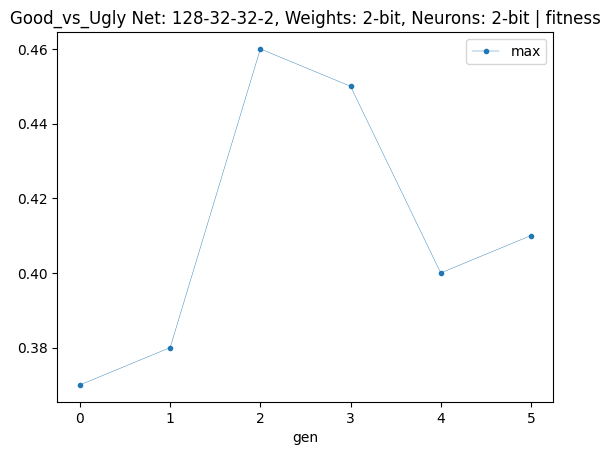

In [7]:
pd.DataFrame(log.chapters['accuracy']).plot("gen", ["max"], kind="line", marker='.', linewidth=0.3)
plt.title(f"{nn} | fitness")

Text(0.5, 1.0, 'Good_vs_Ugly Net: 128-32-32-2, Weights: 2-bit, Neurons: 2-bit | size')

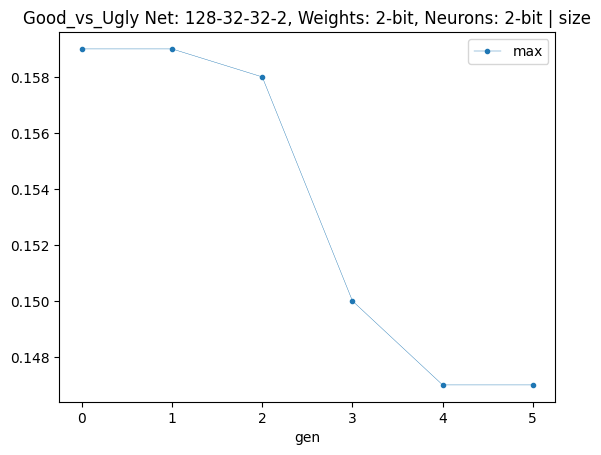

In [8]:
pd.DataFrame(log.chapters['size']).plot("gen", ["max"], kind="line", marker='.', linewidth=0.3)
plt.title(f"{nn} | size")

## Confusion Matrix

In [9]:
cm

array([[31,  0, 19],
       [29,  0, 21],
       [ 0,  0,  0]])

[[31  0 19]
 [29  0 21]
 [ 0  0  0]]
0 0 31 Text(0.0, 0.0, '31')
0 1 29 Text(0.0, 1.0, '29')
0 2 0 Text(0.0, 2.0, '0')
1 0 0 Text(1.0, 0.0, '0')
1 1 0 Text(1.0, 1.0, '0')
1 2 0 Text(1.0, 2.0, '0')
2 0 19 Text(2.0, 0.0, '19')
2 1 21 Text(2.0, 1.0, '21')
2 2 0 Text(2.0, 2.0, '0')


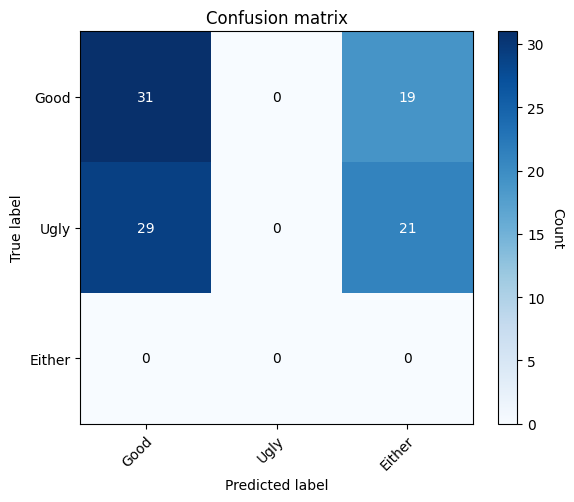

In [10]:
def plot_confusion_matrix(cm,
                          class_names=["Good","Bad","Either"],
                          title='Confusion matrix',
                          cmap='Blues',
                          normalize=False,
                          figsize=(6, 5)):
    """
    Draw a confusion matrix with Matplotlib.

    Parameters
    ----------
    cm : ndarray, shape (n_classes, n_classes)
        The confusion matrix (raw counts or already normalized).
    class_names : list of str, optional
        Human readable names for each class.  If None, uses 0,1,… .
    title : str, optional
    cmap : str or Colormap, optional
        Colormap used for the heat‑map.
    normalize : bool, optional
        If True, each row is normalized to sum to 1 (i.e. per‑class recall).
    figsize : tuple, optional
    """
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    if normalize:
        # Avoid division by zero
        row_sums = cm.sum(axis=1, keepdims=True)
        cm_disp = np.divide(cm, row_sums, where=row_sums != 0)
    else:
        cm_disp = cm

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm_disp, interpolation='nearest', cmap=cmap)

    # Color‑bar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Normalized fraction' if normalize else 'Count',
                       rotation=-90, va="bottom")

    # Tick marks + labels
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=class_names,
        yticklabels=class_names,
        ylabel='True label',
        xlabel='Predicted label',
        title=title
    )

    # Rotate the x‑tick labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Annotate each cell with the numeric value
    thresh = cm_disp.max() / 2.0/1.2
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm_disp[j, i]
            col = "white" if val > thresh else "black"
            r = ax.text(float(i), float(j), format(val, fmt),
                    ha="center", va="center",
                    color=col)
            print(i,j,format(val, fmt),r)

    fig.tight_layout()
    plt.show()

print(cm)
plot_confusion_matrix(cm, class_names=[*inp.LABLES,inp.LABLE_OTHER],)

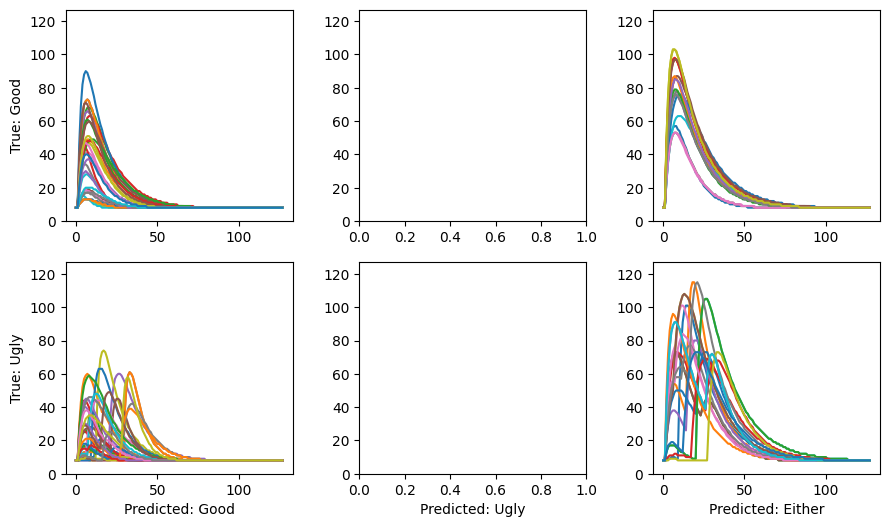

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6*0.9))

max_plts = 100
wf_good, wf_ugly = waveforms[0:len(waveforms)//2], waveforms[len(waveforms)//2:]

cnt = 0
clplot = {0:[0,0], 1:[0,1], 2:[0,2]}
for i in zip(tuple_to_label(nn.predictions[0:len(waveforms)//2][:max_plts]),wf_good[:max_plts]):
    # if i[0]==0:
        axes[*clplot[i[0]]].plot(i[1])
        # print(i[0])

clplot = {0:[1,0], 1:[1,1], 2:[1,2]}
for i in zip(tuple_to_label(nn.predictions[len(waveforms)//2:][:max_plts]),wf_ugly[:max_plts]):
    # if np.sum(i[0])==1:
        axes[*clplot[i[0]]].plot(i[1])
        # print(i[0])

for i in range(2):
    for j in range(3):
        axes[i,j].set_ylim([0,127])

axes[0,0].set_ylabel("True: " + inp.LABLES[0])
axes[1,0].set_ylabel("True: " + inp.LABLES[1])
axes[1,0].set_xlabel("Predicted: " + inp.LABLES[0])
axes[1,1].set_xlabel("Predicted: " + inp.LABLES[1])
axes[1,2].set_xlabel("Predicted: " + inp.LABLE_OTHER)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Good_vs_Ugly Net: 128-32-32-2, Weights: 2-bit, Neurons: 2-bit with Training data')

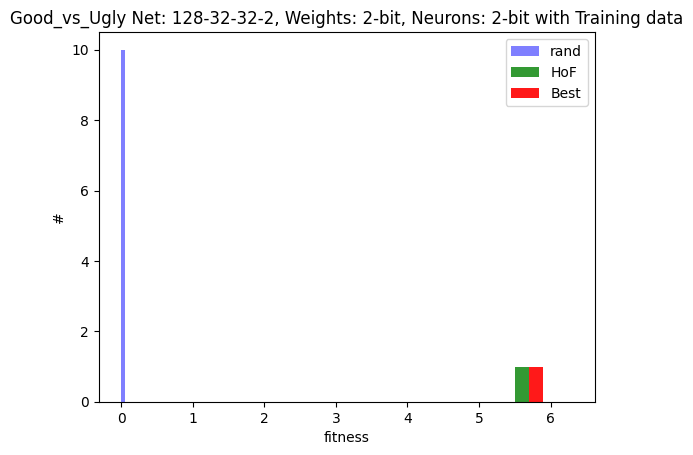

In [14]:
bins = np.linspace(0,1,21)
rand_fitness = [nn.evaluate(nn.get_rand_indi())[0] for _ in range(10)]
plt.hist(rand_fitness, bins=bins, alpha=0.5, color='blue' ,  label="rand")
plt.hist([hof[i].fitness.wvalues[0] for i in range(1, min(10,len(hof)))], bins=5, alpha=0.8, color='green',  label="HoF")
plt.hist([hof[0].fitness.wvalues[0]], bins=5, alpha=0.9, color='red', label="Best")

plt.legend()
plt.xlabel("fitness")
plt.ylabel("#")
plt.title(f"{nn} with Training data")